In [4]:
import cv2

In [5]:
import matplotlib.pyplot as plt

In [6]:
pwd

'C:\\Users\\SOOQ ELASER'

In [7]:
import os
os.getcwd()

'C:\\Users\\SOOQ ELASER'

In [8]:
os.chdir('C:\\Machine Learning Projects')

In [9]:
os.getcwd()

'C:\\Machine Learning Projects'

In [10]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [11]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [12]:
classLabels = [] ## empty list of python
file_name = 'Labels.txt'
with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    

In [13]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [14]:
print(len(classLabels))

80


In [15]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000002B71682B710>

In [14]:
#read an image

In [16]:
img = cv2.imread('mantux.jpg')

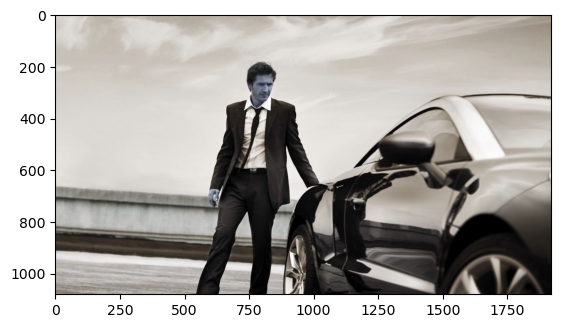

In [17]:
plt.imshow(img)

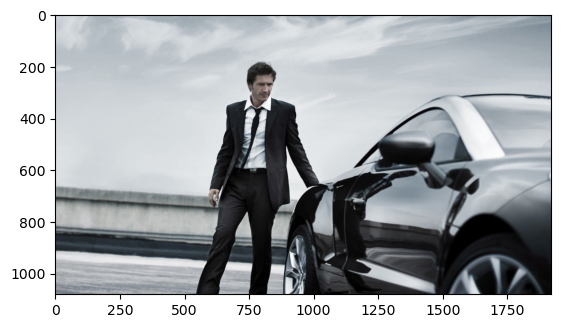

In [18]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [19]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)

In [20]:
print(ClassIndex)

[3 1]


In [21]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40),font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

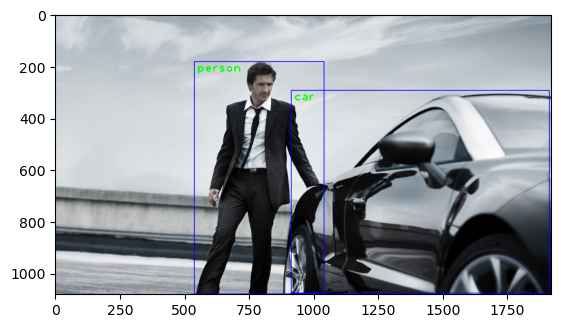

In [22]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [37]:
# Video Demo


In [23]:
cap = cv2.VideoCapture('Busy.mp4')

#Check if the video is opened correctly

if not cap.isOpened():
    cap = cv2.VideoCapture()
if not cap.isOpened():
    raise IOError('Cannot open video')

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame= cap.read()

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    
    print(ClassIndex)

    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40),font, fontScale=font_scale, color=(0, 255, 0), thickness=1)

    cv2.imshow('Object Detection Tutorial', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[ 1  1  1 10]
[ 1  1  1  1 10]
[ 1  1  1  1  8 10]
[ 1  1  1  1 10]
[ 1  1  1  1  1 10]
[ 1  1  1  1 10  8]
[ 1  1  1  8 10]
[ 1  1  1 10  6  8]
[ 1  6  8  1  1 10]
[ 1  8  1  6 10  1]
[ 1  8  6  1 10  1  1  8]
[ 1  8  6  1  1  1  1 10]
[ 1  8  6  1  1  1 10  1  1]
[ 1  8  1  1  6  1  1 10  1]
[ 1  1  6  1  1  1 10  1]
[ 6  1  1  1  1 10  8  1]
[ 6  1  1  1  8 10  1  1]
[ 6  1  1  1  8  1  1 10]
[ 6  1  1  8  1  1  1 10]
[ 6  1  1  1  1 10]
[ 1  6  1  1 10  1]
[ 1  1  1  1 10  8  6]
[ 1  1  1 10  1  8  1  6  1]
[ 1  1  1 10  1  1]
[ 1  1  1 10  6]
[ 1 10  1  1]
[ 1  1 10  1  1]
[ 1  1 10  1  1]
[ 1  1  1 10  1  1]
[ 1 10  1  1]
[ 1  1  1 10  1]
[ 1  1 10  1  1]
[ 1  1 10  1  1]
[ 1  1  1 10]
[ 1  1 10  1 27]
[ 1 27  1 10  1]
[ 1  1 10 27  1  1]
[ 1  1  1 10]
[ 1  1  1 10]
[ 1  1  1 10]
[ 1  1  1 10  1  1  1]
[ 1  1  1  8 10  1  1]
[ 1  1  1  1 10  8  1  1]
[ 1  1  1  1  1  1 10]
[ 1  1  1  1 10  1  1  1  1]
[ 1  1  1 10  1]
[ 1  1  1 10  1  8  1]
[ 1  1  6 10  1  1  1]
[ 1  1  1 10  1 

KeyboardInterrupt: 